Introduction:

Analysis of a dataset containing Customer Shopping Preferences with the aim of providing valuable insight into customer behaviour and shopping patterns. This is crucial for businesses to accommodate their customers and create unique points of communication and advertisement to specific demographics.

Dataset link: https://www.kaggle.com/datasets/iamsouravbanerjee/customer-shopping-trends-dataset


First we import the necessary libraries. We then show the different attributes of the dataset by importing it into a pandas dataframe and displaying the first few rows.

In [121]:
#importing necessary libraries
import pandas as pd
from scipy import stats
import matplotlib.pyplot as  plt

#importing the dataset
data = pd.read_csv('archive/shopping_trends.csv')
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


We have 19 columns of data with a lot of string values that we shall now transform into numerical values and also discretise.

Data Cleaning:

1>Null Values:Checking for null values

In [122]:
#first we check for missing values in the data set
null_count=data.isnull().sum().sum()
print(f'Number of null values : {null_count}')

Number of null values : 0


Since there are no null values, we do not have to remove any rows containing null values or replace null values with mean/median/mode/etc.

We will now choose the categories with string datatype that we will transform and give our reasoning for the transformations.

In [123]:
transform_data=data[['Gender',
                     'Item Purchased',
                     'Category',
                     'Location',
                     'Size',
                     'Color',
                     'Season',
                     'Subscription Status',
                     'Payment Method',
                     'Shipping Type',
                     'Discount Applied',
                     'Promo Code Used',
                     'Preferred Payment Method',
                     'Frequency of Purchases']].copy()


#displays the number of unique values in these columns
for col in transform_data.columns:
    print(col,end=f" : {len(transform_data[col].unique())}\n")

Gender : 2
Item Purchased : 25
Category : 4
Location : 50
Size : 4
Color : 25
Season : 4
Subscription Status : 2
Payment Method : 6
Shipping Type : 6
Discount Applied : 2
Promo Code Used : 2
Preferred Payment Method : 6
Frequency of Purchases : 7


We now have the cardinality of these attributes and can now decide which transformation method to use upon them.

We will transform these values into four types:

->Binary encoding: Suitable for data that has cardinality=2

Used on Gender, Discount Applied, Promo Code Used.

->One-hot encoding: Suitable for data that is nominal and has low cardinality.

Used on Category, Season, Subscription Status.

->Label encoding: Suitable for data that is ordinal in nature.

Used on Size, Color(Darker colors are closer to 0,Lighter colors are closer to 1).

->Frequency Encoding: Suitable for data that is nominal with medium-high cardinality.

Used on Item Purchased, Location, Payment Method, Shipping Type, Preferred Payment Method, Frequency of Purchases.


While using one-hot encoding would preserve the most data, with higher cardinality it would result in too many dimensions and result in data becoming too sparse(curse of dimensionality).

2>Outliers: We are checking for outliers using z scores to calculate normalised standard deviation from the mean and keeping a threshold of 3. We will truncate any row having the Z Scores of Age, Purchase Amount, Review Rating, and Previous Purchases more than 3.

In [124]:
#Removing Outliers using Z Score threshold

data['Age Z_Score']=stats.zscore(data['Age']).abs()
data['Purchase Amount (USD) Z_Score']=stats.zscore(data['Purchase Amount (USD)']).abs()
data['Review Rating Z_Score']=stats.zscore(data['Review Rating']).abs()
data['Previous Purchases Z_Score']=stats.zscore(data['Previous Purchases']).abs()

threshold = 3;

clean_data = data[data['Age Z_Score']<=threshold]
clean_data = data[data['Purchase Amount (USD) Z_Score']<=threshold]
clean_data = data[data['Review Rating Z_Score']<=threshold]
clean_data = data[data['Previous Purchases Z_Score']<=threshold]

clean_data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,...,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,Age Z_Score,Purchase Amount (USD) Z_Score,Review Rating Z_Score,Previous Purchases Z_Score
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,...,Express,Yes,Yes,14,Venmo,Fortnightly,0.718913,0.285629,0.907584,0.785831
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,...,Express,Yes,Yes,2,Cash,Fortnightly,1.648629,0.178852,0.907584,1.616552
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,...,Free Shipping,Yes,Yes,23,Credit Card,Weekly,0.390088,0.558882,0.907584,0.162789
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,...,Next Day Air,Yes,Yes,49,PayPal,Weekly,1.517099,1.276716,0.349027,1.637107
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,...,Free Shipping,Yes,Yes,31,PayPal,Annually,0.061263,0.454531,1.466141,0.391025


The data is displayed after removing the outliers.

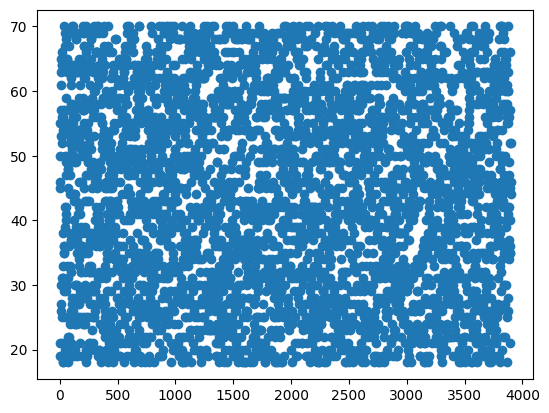

In [125]:
plt.scatter(clean_data['Customer ID'],clean_data['Age'])
